In [4]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns



In [3]:
#loading dataset
df=pd.read_csv("data2/milknew.csv")
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [5]:
#finding null values
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [6]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [8]:
df.shape

(1059, 8)

In [10]:
df.nunique()

pH            16
Temprature    17
Taste          2
Odor           2
Fat            2
Turbidity      2
Colour         9
Grade          3
dtype: int64

In [11]:

df["Grade"].value_counts()

Grade
low       429
medium    374
high      256
Name: count, dtype: int64

In [12]:
import matplotlib.pyplot as plt

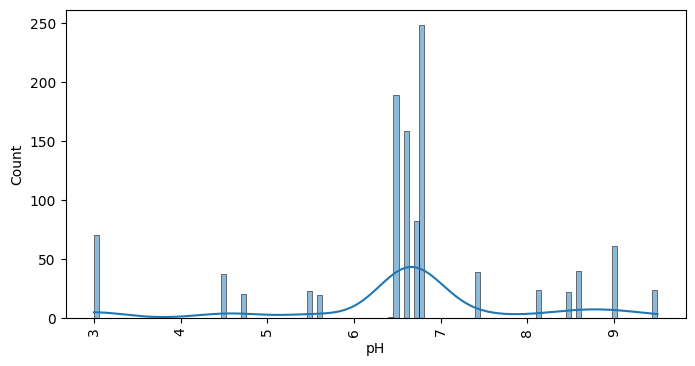

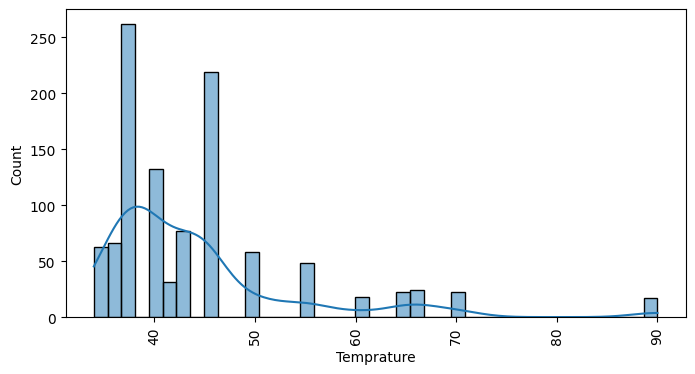

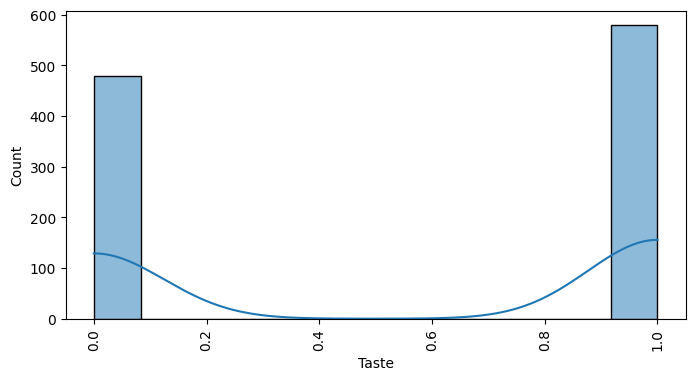

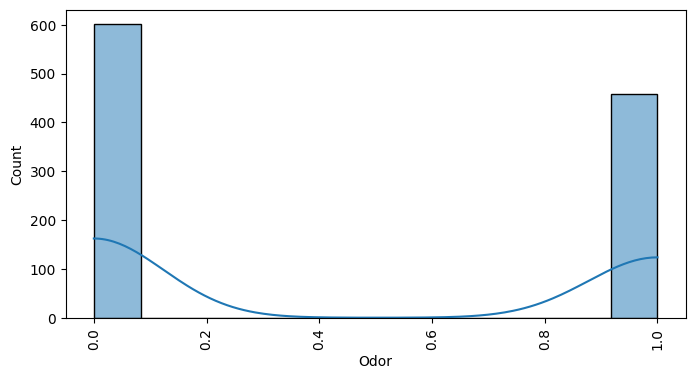

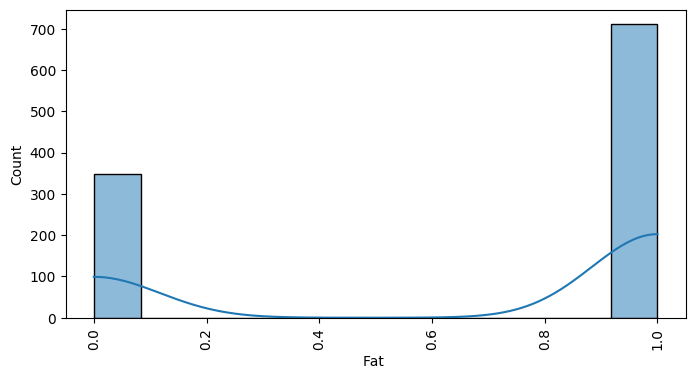

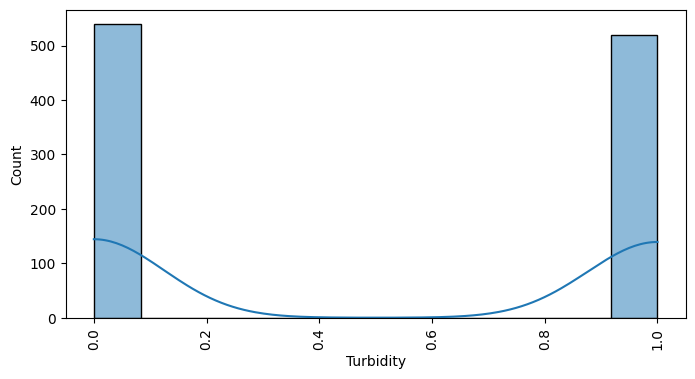

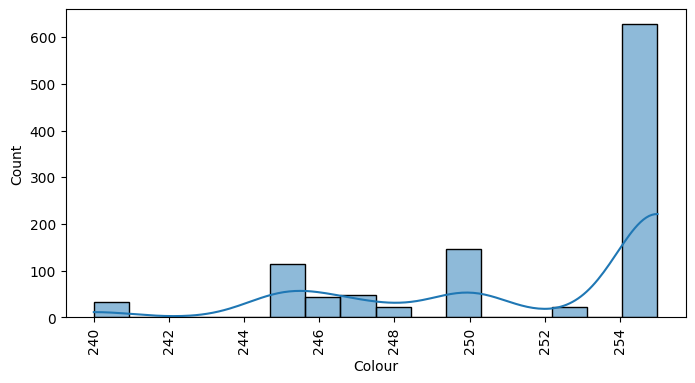

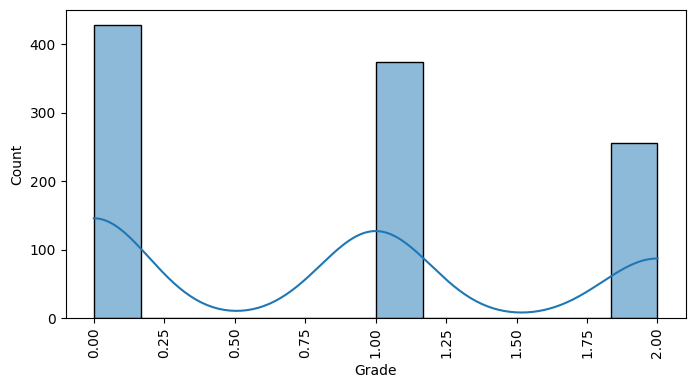

In [61]:
#Data visualization
for i in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df,x=i,kde=True,multiple="stack")
    plt.xticks(rotation=90)
    plt.show()
    

array([[<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'Temprature'}>,
        <Axes: title={'center': 'Taste'}>],
       [<Axes: title={'center': 'Odor'}>,
        <Axes: title={'center': 'Fat '}>,
        <Axes: title={'center': 'Turbidity'}>],
       [<Axes: title={'center': 'Colour'}>, <Axes: >, <Axes: >]],
      dtype=object)

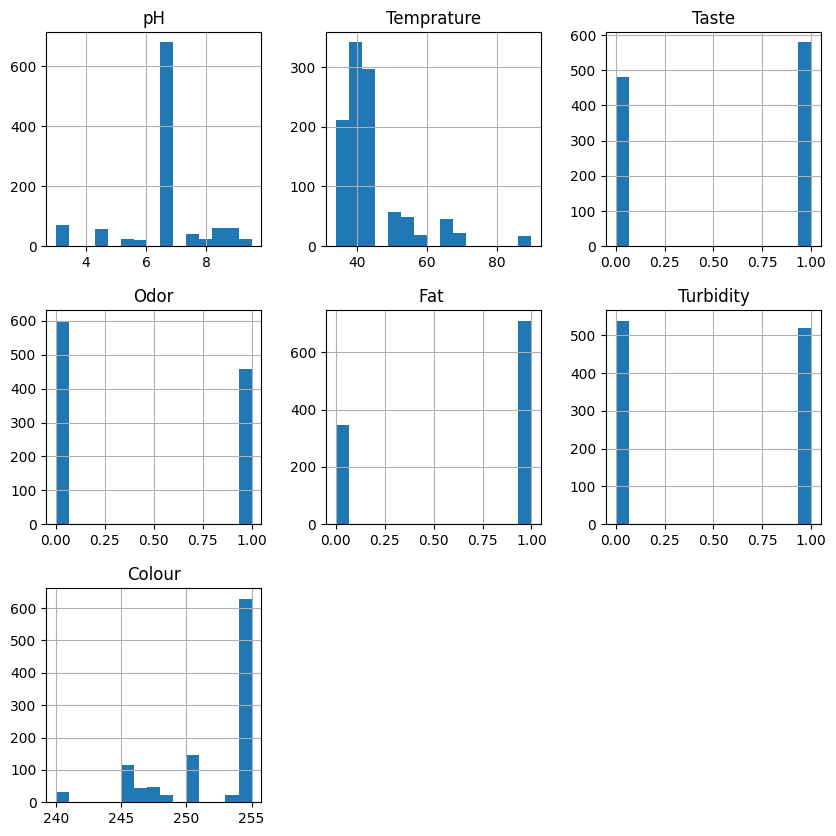

In [16]:
df.hist(figsize=(10,10),bins=15)

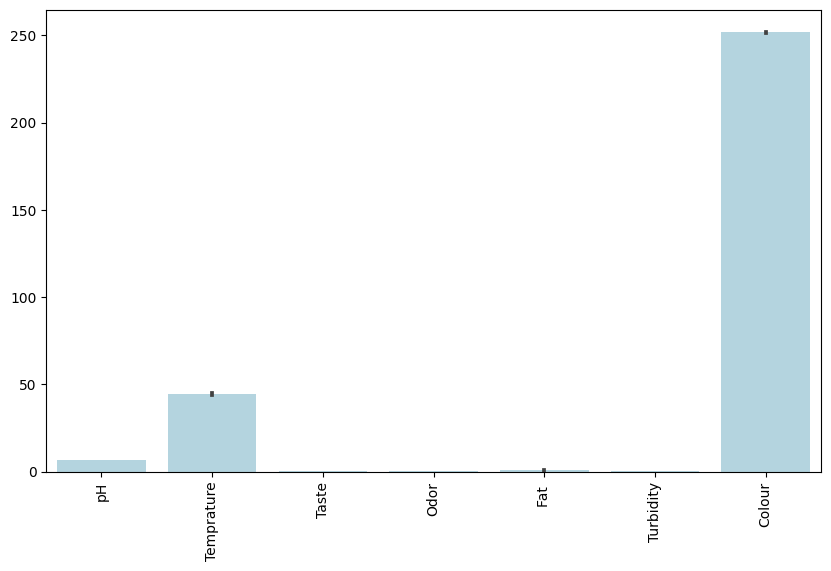

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,color="lightblue")
plt.xticks(rotation=90,fontsize=10)
plt.show()

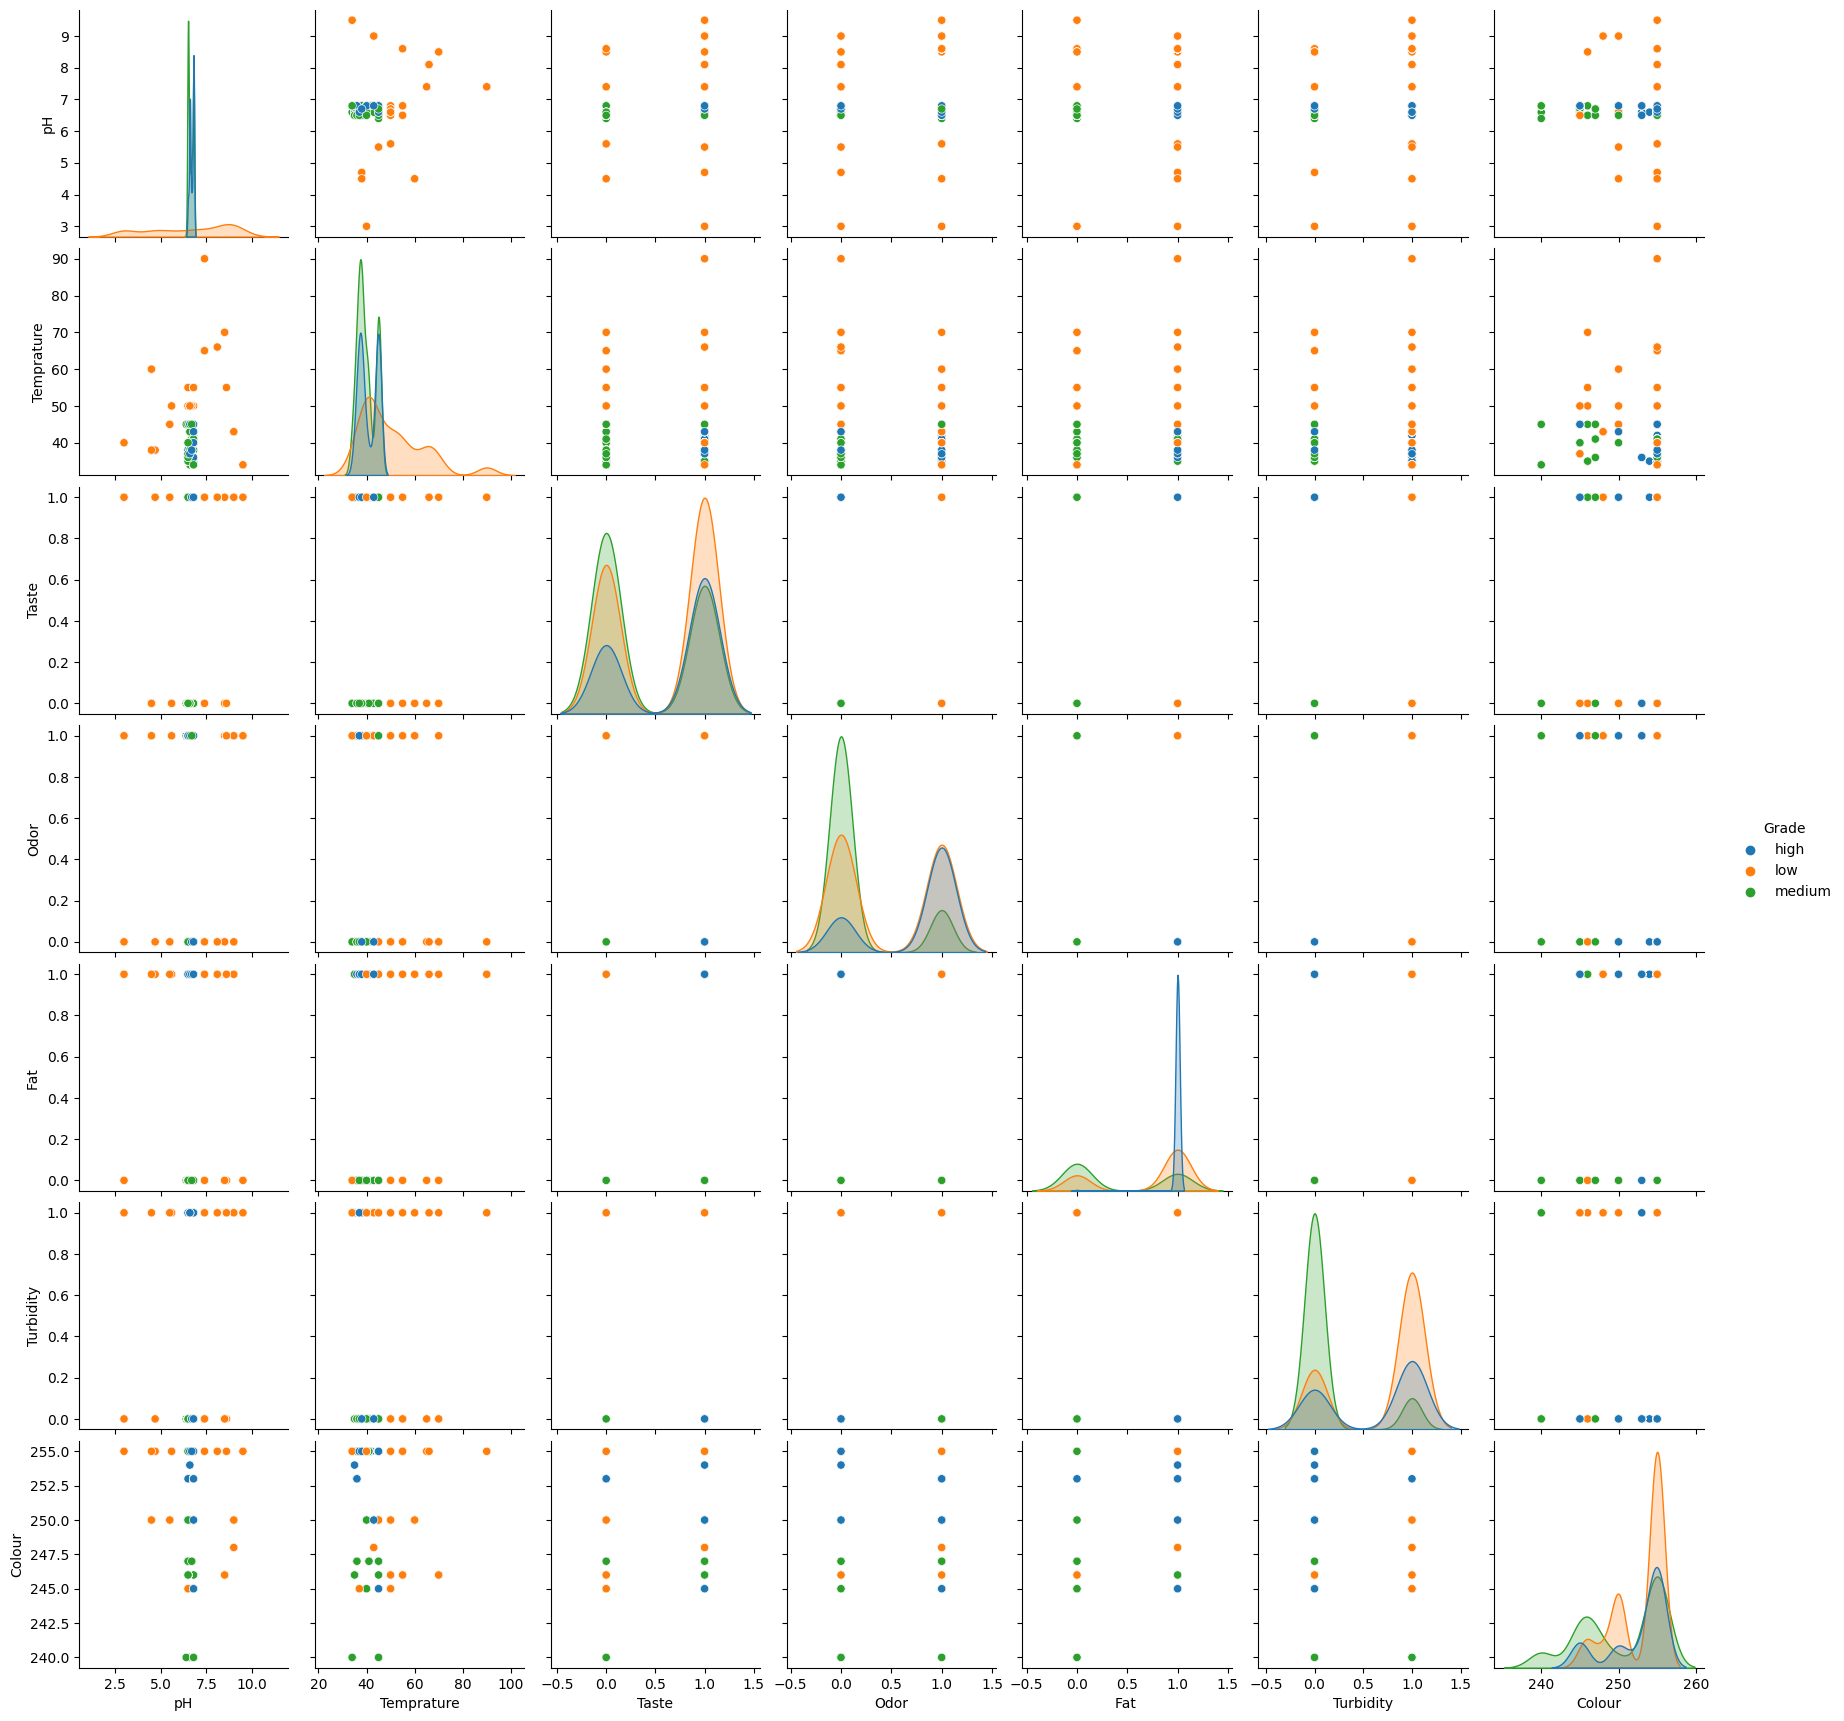

In [20]:
sns.pairplot(df,hue="Grade")

In [39]:
df.head()


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


In [24]:
df["Grade"]=df["Grade"].map({"low":0,"medium":1,"high":2})

In [25]:
#model preparation
x=df.drop("Grade",axis=1)
y=df["Grade"]

In [26]:
x.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255


In [27]:
y.head()

0    2
1    2
2    0
3    0
4    1
Name: Grade, dtype: int64

In [37]:
#model building
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)


In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X_train,y_train)
scaler.transform(X_test)


array([[-0.0080407 , -0.43155851,  0.93311971, ...,  0.6685348 ,
         0.9901752 ,  0.73011263],
       [-1.48604068,  1.58077285, -1.07167385, ...,  0.6685348 ,
         0.9901752 , -0.45824792],
       [ 1.68110213, -0.12970881,  0.93311971, ...,  0.6685348 ,
         0.9901752 , -0.45824792],
       ...,
       [-0.78223117,  0.07152433,  0.93311971, ...,  0.6685348 ,
         0.9901752 , -0.45824792],
       [-0.0080407 , -0.63279165, -1.07167385, ..., -1.49580845,
        -1.00992228,  0.73011263],
       [ 0.06234025, -0.63279165,  0.93311971, ...,  0.6685348 ,
        -1.00992228,  0.73011263]])

In [48]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [49]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [52]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet()
}
model_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)
    print("training accuracy", model.score(X_train,y_train))
    print("testing accuracy", model.score(X_test,y_test))

    
    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
RMSE: 0.6746514971489556
MAE: 0.5388151434058202
R2 score 23.76333991583821
training accuracy 0.28726064372683535
testing accuracy 0.2376333991583821


Lasso
Model Training Performance
RMSE: 0.7112674959949323
MAE: 0.5597228138986167
R2 score 15.263443816703992
training accuracy 0.1627038009534414
testing accuracy 0.15263443816703992


Ridge
Model Training Performance
RMSE: 0.6745852220590939
MAE: 0.53849757097833
R2 score 23.77831755494787
training accuracy 0.28725166520463274
testing accuracy 0.2377831755494787


Elasticnet
Model Training Performance
RMSE: 0.7080076467247484
MAE: 0.5519305651959467
R2 score 16.038385462648076
training accuracy 0.1745197112607889
testing accuracy 0.16038385462648075




In [55]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)



c:\Users\hp\OneDrive\Desktop\MILK_quality\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:

print("training accuracy", lr.score(X_train,y_train))
print("testing accuracy", lr.score(X_test,y_test))

training accuracy 0.7531734837799718
testing accuracy 0.7142857142857143


Text(0.5, 1.03, 'Confusion matrix for logestic regression')

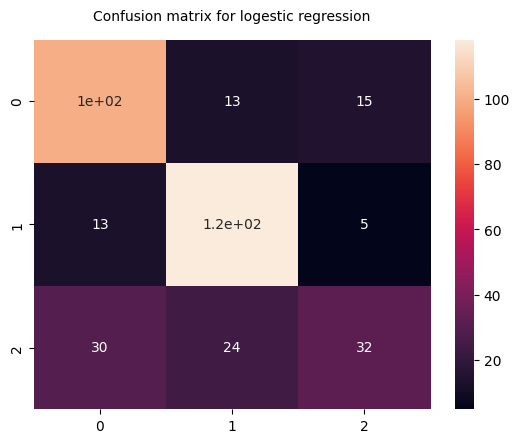

In [58]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=lr.predict(X_test)
cf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion matrix for logestic regression" , fontsize=10,y=1.03)

In [59]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74       128
           1       0.76      0.87      0.81       136
           2       0.62      0.37      0.46        86

    accuracy                           0.71       350
   macro avg       0.69      0.67      0.67       350
weighted avg       0.70      0.71      0.70       350

